In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
print(tf.__version__)

2.16.1


In [4]:
print(hub.__version__)

0.16.1


In [2]:
IMAGE_SHAPE =(224,224)
classifier = keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4', input_shape=IMAGE_SHAPE+(3,))
])

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x000001D0B51E1670> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [3]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

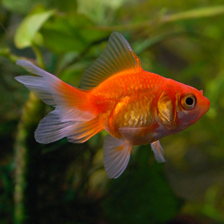

In [4]:
gold_fish=Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
result=classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 1s 1s/step


(1, 1001)

In [7]:
result

array([[ 0.22101423,  2.0474901 ,  9.62256   , ..., -1.4621569 ,
        -0.2814654 , -0.2598486 ]], dtype=float32)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [9]:
image_labels = []
with open('ImageNetLabels.txt', 'r') as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [10]:
image_labels[predicted_label_index]

'goldfish'

In [11]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [12]:
data_dir

'./datasets/flower_photos'

In [13]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [15]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/15602874619_03fd934bed.jpg')]

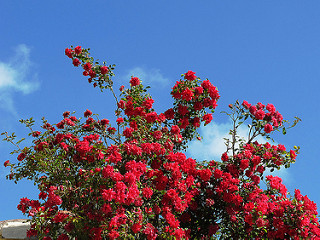

In [16]:
Image.open(str(roses[199]))

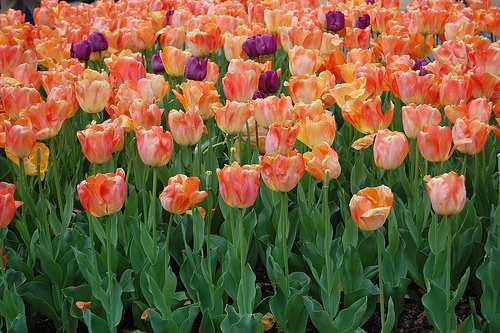

In [17]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[199]))

In [18]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}


In [19]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/17062080069_36ac7907d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14408977935_a397e796b8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/9216321995_83df405ea9.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/15602874619_03fd934bed.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3171577977_8608282f04_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1813435848_7852708394_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/4609166128_b7ed49b40b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4625089819_55c45a189c.jpg'),
 PosixPath('datasets/flower_photos/roses/23891005905_17ce9e6936.jpg'),
 PosixPath('datasets/flower_photos/roses/2682566502_967e7eaa2a.jpg'),
 PosixPath('datasets/flower_photos/roses/5578760521_e54aca6bed_n.jpg'),
 P

In [20]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [21]:
X, y = [], []
for name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[name])

In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [24]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

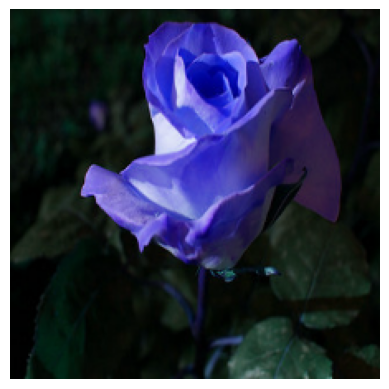

In [25]:
plt.axis('off')
plt.imshow(X[0])

In [26]:
predicted=classifier.predict(np.array([X[0],X[1],X[2]]))

1/1 [==============================] - 1s 586ms/step


In [27]:
predicted = np.argmax(predicted,axis=1)
predicted

array([722, 722, 550])

In [28]:
image_labels[550]

'envelope'

In [29]:
feature_extractor_model ='https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224,224,3),trainable=False)


In [30]:
num_of_flowers=5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 5)                 5010      
                                                                 
Total params: 3545275 (13.52 MB)
Trainable params: 5010 (19.57 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    metrics=['acc']
)
model.fit(X_train_scaled, y_train)